New York City Airbnb Open Data

Airbnb listings and metrics in NYC, NY, USA (2019)

https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data


In [ ]:
!pip3 install plotly==4.8
!pip3 install swifter

     |████████████████████████████████| 11.5 MB 4.3 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=77e594098c2b7bda96c0ca2b83947a7889db1402a6d19561e6e02d0e52c7e36e
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0
     |████████████████████████████████| 280 kB 8.6 MB/s 
     |████████████████████████████████| 133 kB 51.5 MB/s 
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


In [ ]:
import matplotlib.pyplot as plt
from skimage.io import imread

In [ ]:
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.listdir('/content/drive')

['.file-revisions-by-id', 'MyDrive', '.shortcut-targets-by-id', '.Trash-0']

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/AB_NYC_2019.csv'

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import swifter
%matplotlib inline
df = pd.read_csv(file_path)

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df['host_id'].nunique()

37457

In [ ]:
df[df['host_id'].duplicated()]  #some hosts have several listings

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
22,8025,CBG Helps Haiti Room#2.5,22486,Lisel,Brooklyn,Park Slope,40.67989,-73.97798,Private room,80,1,39,2019-01-01,0.37,6,364
23,8110,CBG Helps Haiti Rm #2,22486,Lisel,Brooklyn,Park Slope,40.68001,-73.97865,Private room,110,2,71,2019-07-02,0.61,6,304
33,9783,back room/bunk beds,32294,Ssameer Or Trip,Manhattan,Harlem,40.82130,-73.95318,Private room,50,3,273,2019-07-01,2.37,3,359
35,10962,"Lovely room 2 & garden; Best area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66869,-73.98780,Private room,89,4,168,2019-06-21,1.41,3,340
39,12048,LowerEastSide apt share shortterm 1,7549,Ben,Manhattan,Lower East Side,40.71401,-73.98917,Shared room,40,1,214,2019-07-05,1.81,4,188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48887,36483152,Garden Jewel Apartment in Williamsburg New York,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,170,1,0,NaN,NaN,3,365
48889,36484363,QUIT PRIVATE HOUSE,107716952,Michael,Queens,Jamaica,40.69137,-73.80844,Private room,65,1,0,NaN,NaN,2,163
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36


In [ ]:
df[df['host_id']==22486]  #eg. this host has 6 listings

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
21,8024,CBG CtyBGd HelpsHaiti rm#1:1-4,22486,Lisel,Brooklyn,Park Slope,40.68069,-73.97706,Private room,130,2,130,2019-07-01,1.09,6,347
22,8025,CBG Helps Haiti Room#2.5,22486,Lisel,Brooklyn,Park Slope,40.67989,-73.97798,Private room,80,1,39,2019-01-01,0.37,6,364
23,8110,CBG Helps Haiti Rm #2,22486,Lisel,Brooklyn,Park Slope,40.68001,-73.97865,Private room,110,2,71,2019-07-02,0.61,6,304
476,167222,CBG# 4Tiny room w/ huge window/AC,22486,Lisel,Brooklyn,Park Slope,40.67880,-73.97643,Private room,60,1,20,2018-08-24,0.21,6,258
588,222054,CBG Helps Haiti Rm #3,22486,Lisel,Brooklyn,Park Slope,40.68012,-73.97847,Private room,120,2,23,2018-09-15,0.24,6,342
1783,801626,CBG HelpsHaiti #5 Suite,22486,Lisel,Brooklyn,Park Slope,40.68015,-73.97800,Private room,115,2,25,2019-05-26,0.36,6,89


In [ ]:
df.shape

(48895, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.describe() #pay attention to price max min, look for outliers

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
df.nunique() #id has same number as rows, all listings are unique
#host_id is less than listings, some hosts have more than one listing.

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [ ]:
df = df.drop(columns = ['id','name'],axis = 1)
#keep host_id to know which host is most popular and has best review
#host_id is a more accurate data than host_name because some names may be common

In [ ]:
df.isnull().sum()

host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## Data Cleaning

In [ ]:
p1 = df.price.quantile(0.01)
p99 = df.price.quantile(0.99)
print(p1,p99)

df[(df.price >= p1) & (df.price <= p99)].describe()
df = df[(df.price >= p1) & (df.price <= p99)]

30.0 799.0


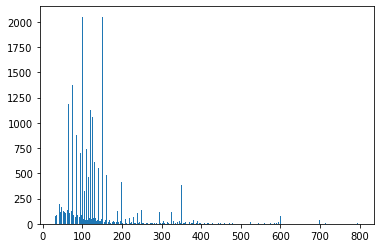

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = df.price

plt.hist(x,1000)
plt.show() 

In [ ]:
p1_min_night = df.minimum_nights.quantile(0.01)
p99_min_night = df.minimum_nights.quantile(0.99)
print(p1_min_night,p99_min_night )

df = df[(df.minimum_nights >= p1_min_night) & (df.minimum_nights <= p99_min_night)]

1.0 40.0


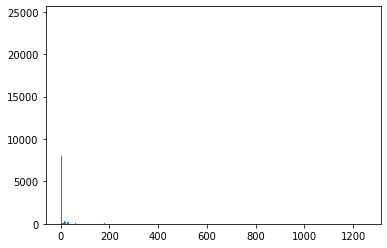

In [ ]:
x = df.minimum_nights

plt.hist(x,1000)
plt.show() 

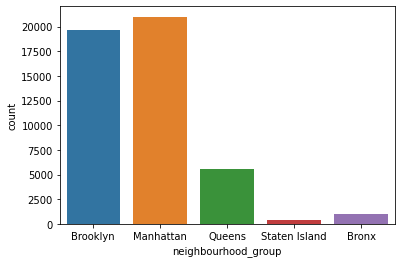

In [ ]:
#which neighbourhood groups have most listings
#the skewed number of listings may contribute to inaccuracy of ML?
sns.countplot('neighbourhood_group',data=df)

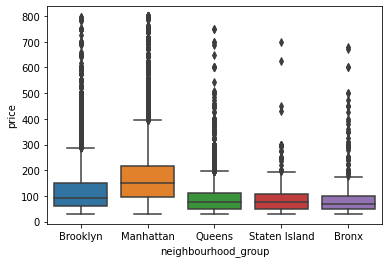

In [ ]:
sns.boxplot('neighbourhood_group', 'price', data=df)

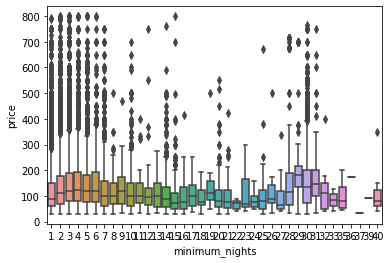

In [ ]:
sns.boxplot('minimum_nights', 'price', data=df)

#downward trend in price with increase of min nights

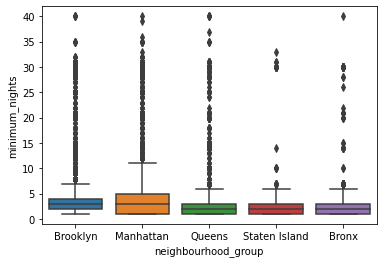

In [ ]:
sns.boxplot('neighbourhood_group', 'minimum_nights', data=df)

#manhattan tops the list, then brooklyn

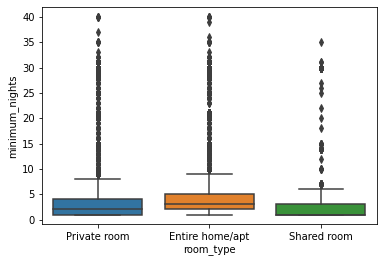

In [ ]:
sns.boxplot('room_type', 'minimum_nights', data=df)

#entire home tops the list, then private

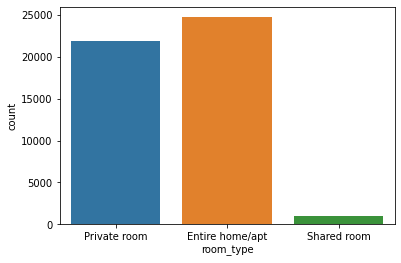

In [ ]:
sns.countplot('room_type',data=df)

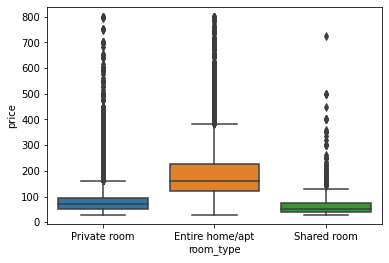

In [ ]:
#check for price distribution
sns.boxplot('room_type', 'price', data=df)

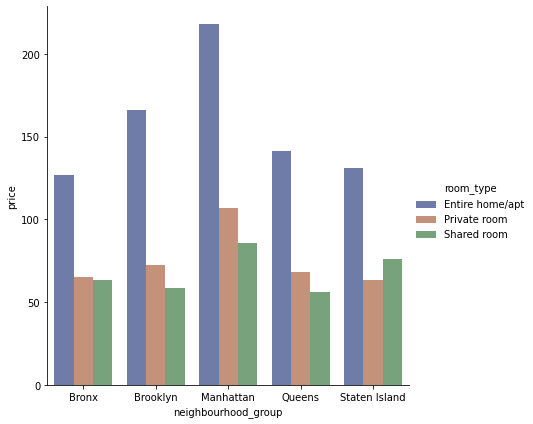

In [ ]:
sns.catplot(
    data=df.groupby(['room_type','neighbourhood_group']).mean().reset_index(), kind="bar",
    x="neighbourhood_group", y="price", hue="room_type",
    ci="sd", palette="dark", alpha=.6, height=6
)

In [ ]:
df_heatmap = df[['host_id', 'latitude',
                    'longitude', 'price', 'minimum_nights',
                    'number_of_reviews','reviews_per_month',
                    'calculated_host_listings_count', 'availability_365']].corr()

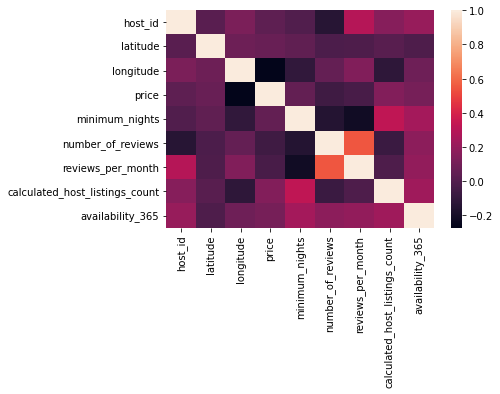

In [ ]:
sns.heatmap(df_heatmap)

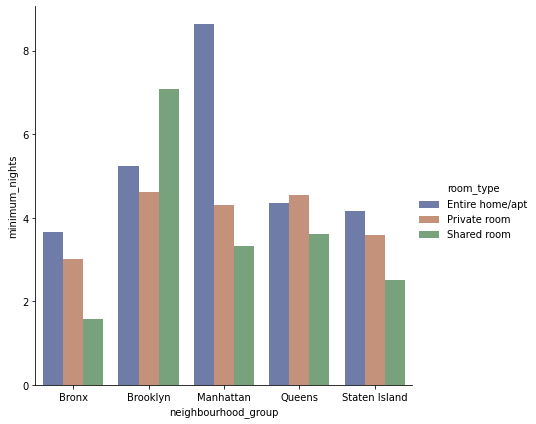

In [ ]:
#room type and neighbourhood group vs min nights
sns.catplot(
    data = df.groupby(['room_type','neighbourhood_group']).mean().reset_index(), kind="bar",
    x="neighbourhood_group", y="minimum_nights", hue="room_type",
    ci="sd", palette="dark", alpha=.6, height=6
)

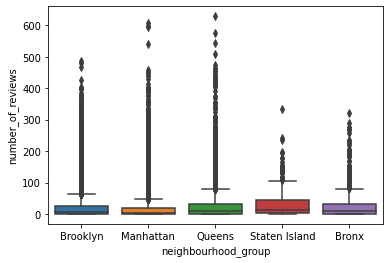

In [ ]:
sns.boxplot('neighbourhood_group', 'number_of_reviews', data=df)

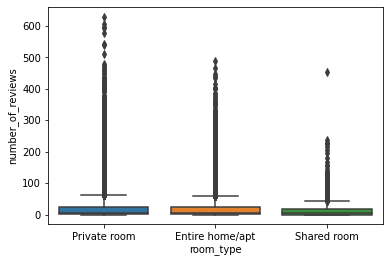

In [ ]:
sns.boxplot('room_type', 'number_of_reviews', data=df)

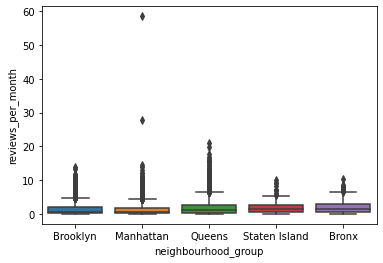

In [ ]:
sns.boxplot('neighbourhood_group', 'reviews_per_month', data=df)

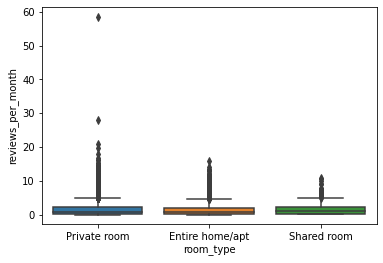

In [ ]:
sns.boxplot('room_type', 'reviews_per_month', data=df)

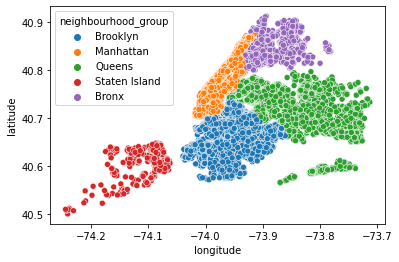

In [ ]:
sns.scatterplot(x ='longitude', y ='latitude', data = df, hue ='neighbourhood_group' )

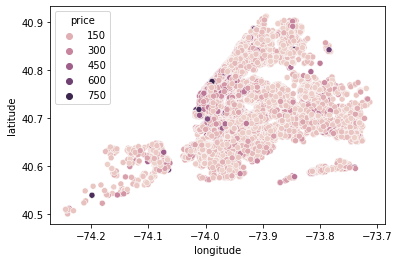

In [ ]:
sns.scatterplot(x ='longitude', y ='latitude', data = df, hue ='price' )

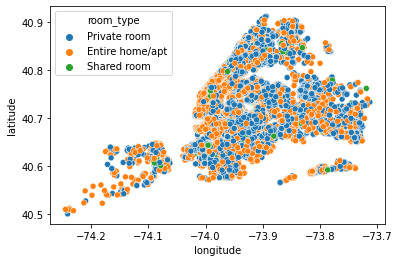

In [ ]:
sns.scatterplot(x ='longitude', y ='latitude', data = df, hue ='room_type' )

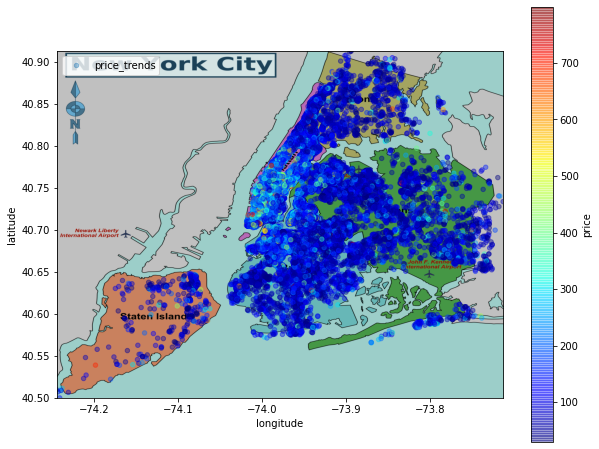

In [ ]:
plt.figure(figsize=(10,7))
img=imread('/content/drive/MyDrive/Colab Notebooks/New_York_City_District_Map.png')
plt.imshow(img,zorder=0,extent=[df['longitude'].min(),df['longitude'].max(),df['latitude'].min(),df['latitude'].max()])
ax = plt.gca()
df.plot(kind='scatter', x='longitude', y='latitude', label='price_trends', c='price',ax=ax,
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
plt.legend()
plt.show()

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df

,index,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47537,48890,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
47538,48891,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
47539,48892,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
47540,48893,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
df.drop(columns = ['index'])

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47537,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
47538,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
47539,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
47540,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
df.isnull().sum()

index                                0
host_id                              0
host_name                           20
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       9523
reviews_per_month                 9523
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [ ]:
df = df[~df['last_review'].isnull()]

In [ ]:
df.shape

(38019, 15)

In [ ]:
df.isnull().sum()

index                              0
host_id                            0
host_name                         15
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [ ]:
df.to_csv('NYCAnB_cleaned.csv')

In [ ]:
from google.colab import files
files.download('NYCAnB_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks' + '/' + 'NYCAnB_cleaned.csv')

In [ ]:
from google.colab import files
files.download('/content/drive/MyDrive/Colab Notebooks' + '/' + 'NYCAnB_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>